# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sinasc = pd.read_csv('sinasc_RO_2019.csv')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [6]:
sinasc.loc[sinasc['APGAR5'] >= 8, 'apgar_cat'] = 'normal'
sinasc.loc[sinasc['APGAR5'] < 8, 'apgar_cat'] = 'asfixia leve'
sinasc.loc[sinasc['APGAR5'] < 6, 'apgar_cat'] = 'asfixia moderada'
sinasc.loc[sinasc['APGAR5'] < 4, 'apgar_cat'] = 'asfixia severa'
sinasc['apgar_cat'].value_counts()

apgar_cat
normal              26463
asfixia leve          320
nan                   103
asfixia severa         74
asfixia moderada       68
Name: count, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

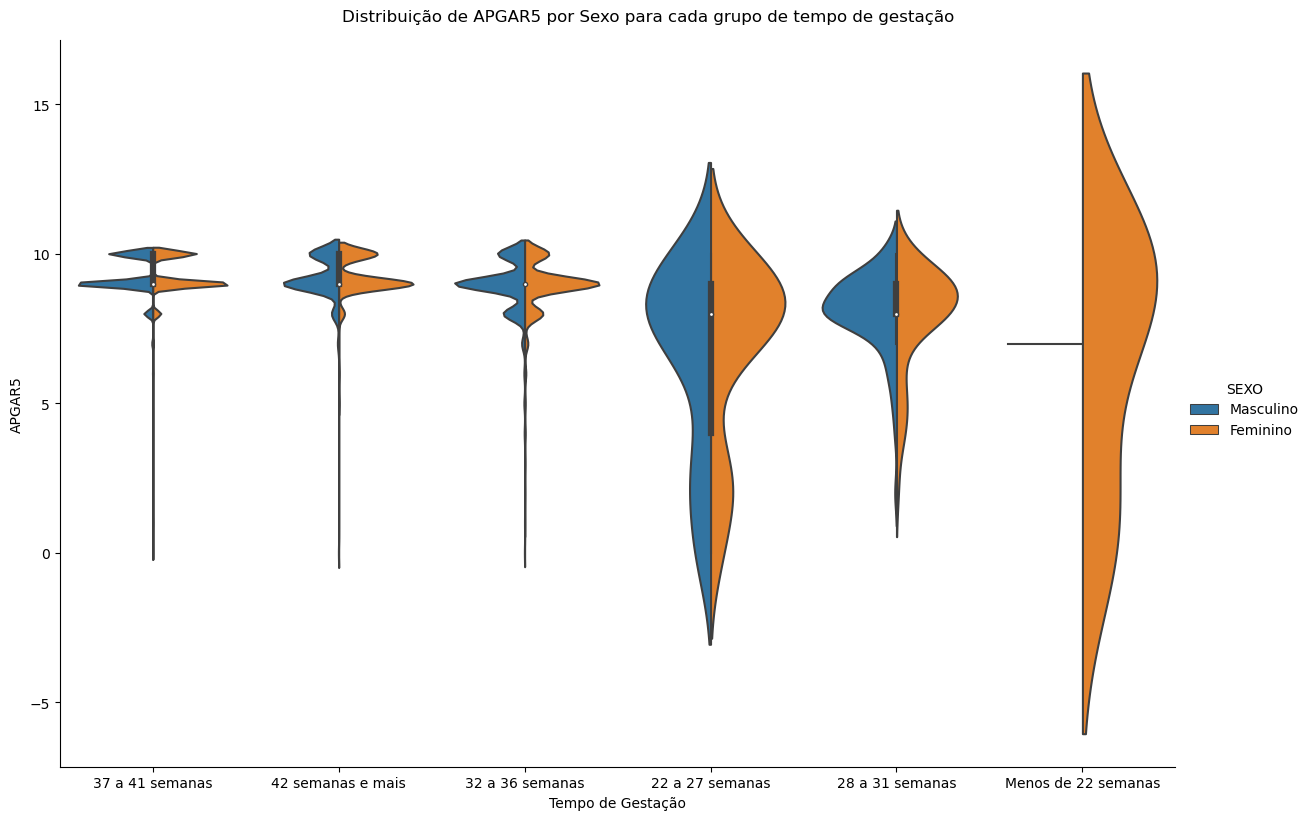

In [10]:
g = sns.catplot(x='GESTACAO', y='APGAR5', hue='SEXO', data=sinasc, kind='violin', split=True, height=8, aspect=1.5)

g.set_axis_labels('Tempo de Gestação', 'APGAR5')
g.fig.suptitle('Distribuição de APGAR5 por Sexo para cada grupo de tempo de gestação', y=1.02)

plt.show()


####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [11]:
tabela_cruzada = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5'])

print(tabela_cruzada)


APGAR5               0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
GESTACAO                                                                    
22 a 27 semanas         7     0     8     6     1     0     2    10    24   
28 a 31 semanas         0     0     2     1     5     7     7    11    61   
32 a 36 semanas         2     2     2     2     8    11    17    56   362   
37 a 41 semanas         5    20     3     5     7    21    45   151  1417   
42 semanas e mais       1     0     0     0     0     1     1     5    44   
Menos de 22 semanas     1     0     1     0     0     0     0     1     0   

APGAR5                9.0   10.0  
GESTACAO                          
22 a 27 semanas         19     8  
28 a 31 semanas         55    13  
32 a 36 semanas       1307   465  
37 a 41 semanas      13565  7284  
42 semanas e mais      423   223  
Menos de 22 semanas      3     1  


####  5) Da tabela cruzada do item anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [12]:
tabela_cruzada = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5'])

percentual_linhas = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5'], normalize='index') * 100

print(percentual_linhas)


APGAR5                    0.0       1.0        2.0       3.0       4.0   \
GESTACAO                                                                  
22 a 27 semanas       8.235294  0.000000   9.411765  7.058824  1.176471   
28 a 31 semanas       0.000000  0.000000   1.234568  0.617284  3.086420   
32 a 36 semanas       0.089526  0.089526   0.089526  0.089526  0.358102   
37 a 41 semanas       0.022200  0.088798   0.013320  0.022200  0.031079   
42 semanas e mais     0.143266  0.000000   0.000000  0.000000  0.000000   
Menos de 22 semanas  14.285714  0.000000  14.285714  0.000000  0.000000   

APGAR5                   5.0       6.0        7.0        8.0        9.0   \
GESTACAO                                                                   
22 a 27 semanas      0.000000  2.352941  11.764706  28.235294  22.352941   
28 a 31 semanas      4.320988  4.320988   6.790123  37.654321  33.950617   
32 a 36 semanas      0.492390  0.760967   2.506714  16.204118  58.504924   
37 a 41 semanas    

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

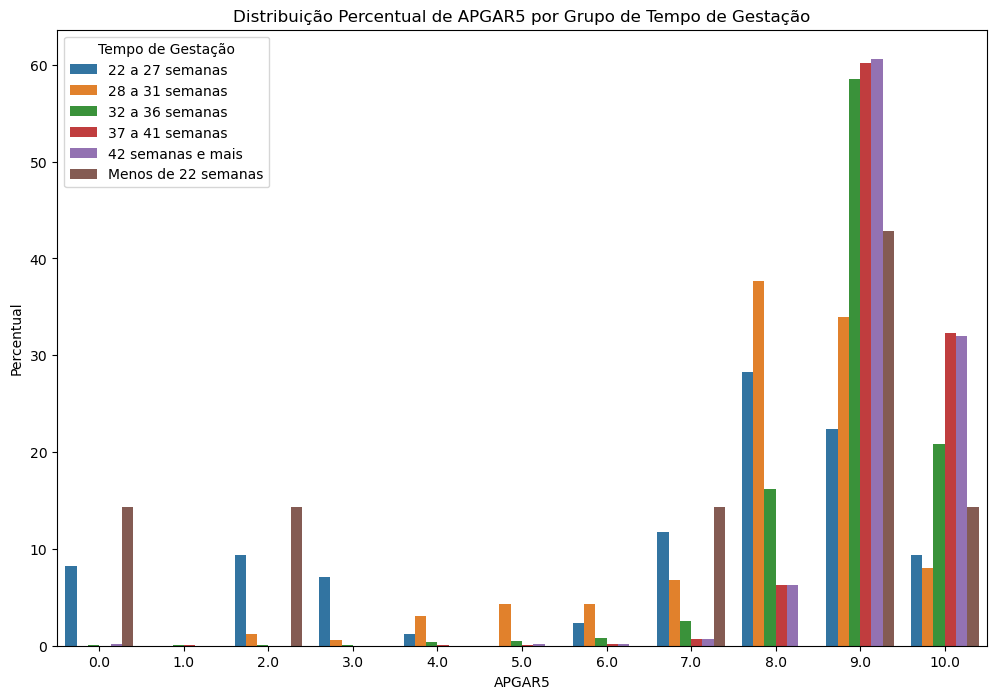

In [13]:
percentual_linhas = percentual_linhas.reset_index().melt(id_vars='GESTACAO', var_name='APGAR5', value_name='Percentual')

plt.figure(figsize=(12, 8))
sns.barplot(x='APGAR5', y='Percentual', hue='GESTACAO', data=percentual_linhas)
plt.title('Distribuição percentual de APGAR5 por grupo de tempo de gestação')
plt.xlabel('APGAR5')
plt.ylabel('Percentual')
plt.legend(title='Tempo de Gestação')
plt.show()

# O conjunto de dados parece demonstrar uma prevalência quase exclusiva de nascidos com 27 semanas ou menos dentro dos 
# parâmentros de asfixia grave, então parece corroborar, sim, a afirmação dos médicos. 

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

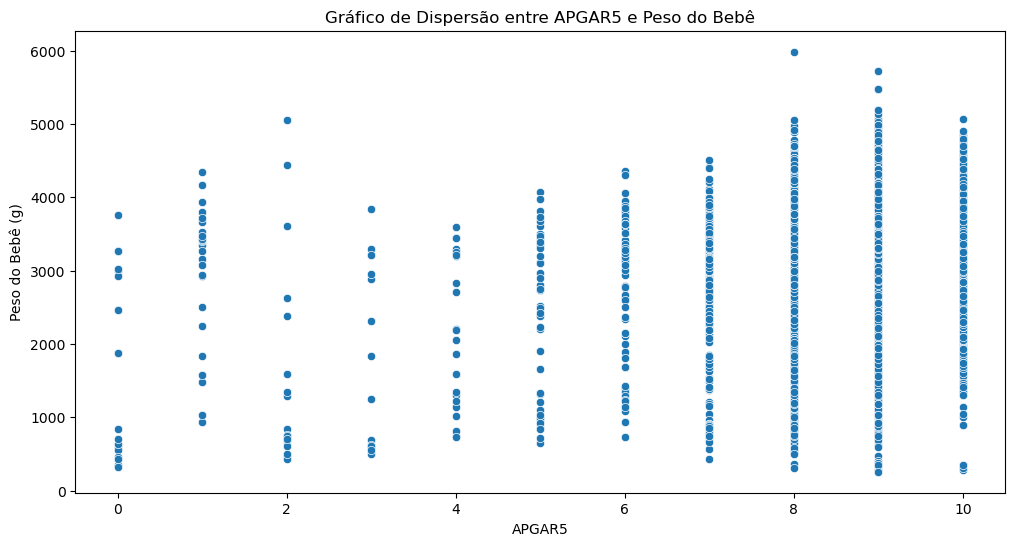

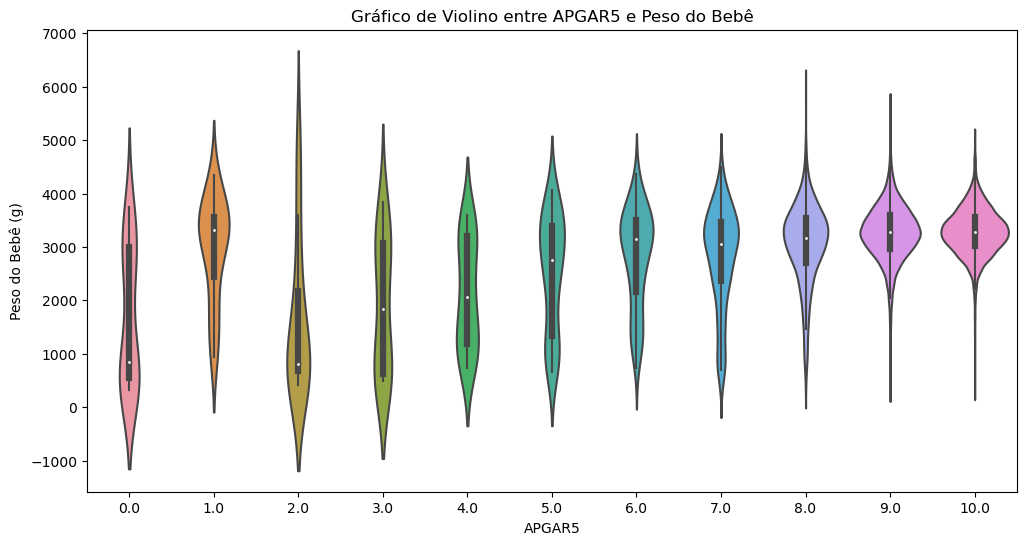

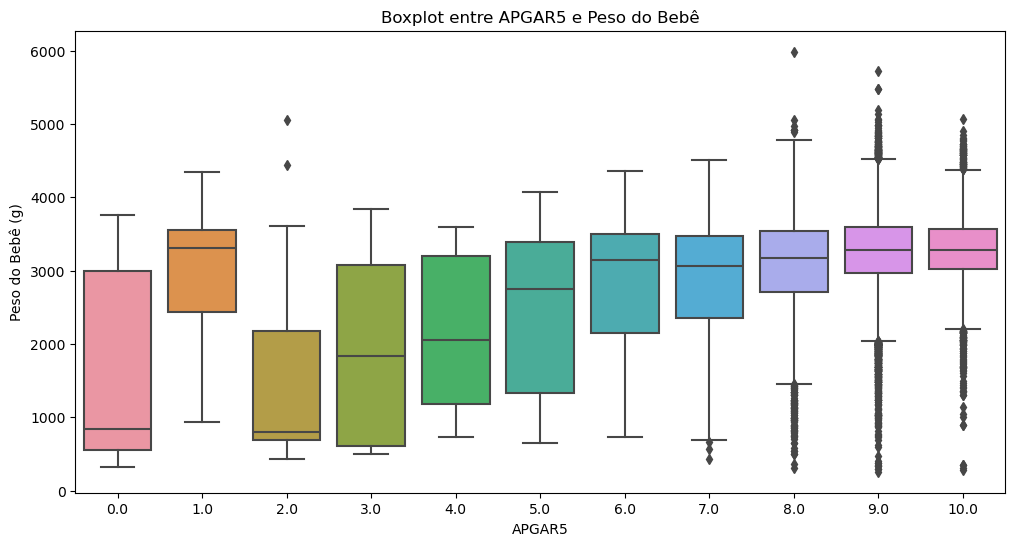

In [14]:
# Gráfico de dispersão
plt.figure(figsize=(12, 6))
sns.scatterplot(x='APGAR5', y='PESO', data=sinasc)
plt.title('Gráfico de Dispersão entre APGAR5 e Peso do Bebê')
plt.xlabel('APGAR5')
plt.ylabel('Peso do Bebê (g)')
plt.show()

# Gráfico de violino
plt.figure(figsize=(12, 6))
sns.violinplot(x='APGAR5', y='PESO', data=sinasc)
plt.title('Gráfico de Violino entre APGAR5 e Peso do Bebê')
plt.xlabel('APGAR5')
plt.ylabel('Peso do Bebê (g)')
plt.show()

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='APGAR5', y='PESO', data=sinasc)
plt.title('Boxplot entre APGAR5 e Peso do Bebê')
plt.xlabel('APGAR5')
plt.ylabel('Peso do Bebê (g)')
plt.show()
